## Hello everybody 😃 😃 welcome back

In [1]:
import os
import cv2 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from keras.utils import to_categorical

# Image Size
IMG_ROWS, IMG_COLS = 64, 64 # input image dimensions
NB_CLASSES =  4 # number of outputs = number of digits

In [2]:
#########################################################################
# (01)   ACQUISITION DES DONNEES - IMAGES DES FEUILLES DES PLANTES.     #
#########################################################################

In [3]:
########################################### function for plotting images

def plot_images(images, total_images=100, rows=20, cols=5, fsize=(20,100), titre='Image'):
    
    fig = plt.figure(figsize=fsize) # create a new figure window
    
    for i in range(total_images): # display images
        # subplot : 33 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i])
        
        plt.title(titre)
 
############################################ function for resizng images
       
def preprocess_image(image, image_height=IMG_ROWS, image_width=IMG_COLS):

    return cv2.resize(image, (image_height, image_width))
        
def read_images (path , sz= None ):
    
    print('\nCHARGEMENT DES IMAGES DE LA BASE .......................!\n') 

    X,y = [], []
    
    for dirname , dirnames , filenames in os.walk(path):
        
        c = 0
        
        for subdirname in dirnames :
            
            subject_path = os. path . join ( dirname , subdirname )
            
            for filename in os. listdir ( subject_path ):
                
                im = Image.open(os.path.join(subject_path, filename))
                #im = im.convert ("L")

                if (sz is not None ):
                    im = im.resize (sz , Image.ANTIALIAS ) 
                    
                im = np.array(im)
                im = preprocess_image(im, IMG_ROWS, IMG_COLS)
                X.append(im)
                y.append (c)  
                
            c = c+1
            
    return [X,y]



LECTURE DES IMAGES DE LA BASE DE TEST...................!

CHARGEMENT DES IMAGES DE LA BASE .......................!


CHARGEMENT DES IMAGES DE LA BASE .......................!


AFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!


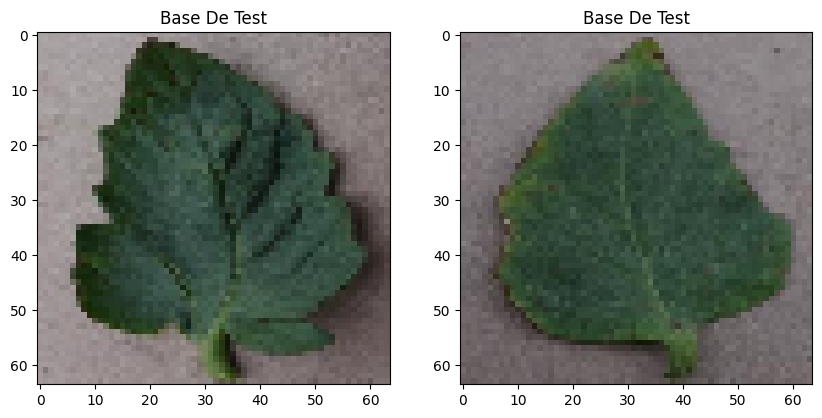


FIN D'AFFICHAGE DES IMAGES DE LA BASE...................!



In [4]:
############################################ Read And Resize test images

print('\n\nLECTURE DES IMAGES DE LA BASE DE TEST...................!') 

[X_test, y_test] = read_images("C:/Users/Dell 7280/Documents/Etude/ESCEP/S3/Deep learning/Corrections/TP4-Tomato/Data/TestData") # Potato

[X_train, y_train] = read_images("C:/Users/Dell 7280/Documents/Etude/ESCEP/S3/Deep learning/Corrections/TP4-Tomato/Data/TrainData") # Potato

print('\nAFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!')
plot_images(X_test, 2, 1, 2,(10, 50), titre='Base De Test')
plt.show()
print('\nFIN D\'AFFICHAGE DES IMAGES DE LA BASE...................!\n')

In [5]:
############################################################## Test Data

# Train Data
images_train = np.asarray(X_train)

# Test Data
images_train = np.asarray(X_test)

# Train targets
train_features = images_train
train_targets = np.asarray(y_train)

# Test targets
test_features = images_train
test_targets = np.asarray(y_test)

test_features = test_features.astype('float32')
train_features = train_features.astype('float32')

In [6]:
print('\nNORMALISATION DES BASES DE TEST ET D\'APPRENTISSAGE.\n')
########################################################## Normalisation

mean_vals = np.mean(train_features, axis=0)
std_val = np.std(train_features)
test_features = (test_features - mean_vals)/std_val

test_features = test_features.reshape(test_features.shape[0], IMG_ROWS, IMG_COLS, 3)

print("test_features.shape      >==============<> : {}".format(test_features.shape))
print("test_targets.shape       >==============<> : {}".format(test_targets.shape))


NORMALISATION DES BASES DE TEST ET D'APPRENTISSAGE.

test_features.shape      >==============<> : (1854, 64, 64, 3)
test_targets.shape       >==============<> : (1854,)


In [7]:
########################################################################
#(02)           EVALUATION DES PERFORMANCES DU MODELE CREE             #
########################################################################

VERBOSE = 1

from keras.models import load_model
from keras.utils import to_categorical
import numpy as np

# Chargement du modèle entraîné
model_new = load_model("ResNet_model_groupe_2.h5")

# Préparer les données de test
images_test = np.asarray(X_test)
test_features = images_test
test_targets = np.asarray(y_test)

# Définir NB_CLASSES en fonction des étiquettes de test
NB_CLASSES = model_new.output_shape[1]  # Utiliser le nombre de classes attendues par le modèle

# Convertir les vecteurs de classe en matrices de classe binaires pour les données de test
test_targets = to_categorical(test_targets, NB_CLASSES)

# Normalisation des données de test
test_features = test_features.astype('float32')
test_features = (test_features - mean_vals) / std_val

# Vérifiez les dimensions des données de test
print("test_features.shape      >==============<> : {}".format(test_features.shape))
print("test_targets.shape       >==============<> : {}".format(test_targets.shape))

# Évaluation du modèle
score = model_new.evaluate(test_features, test_targets, verbose=VERBOSE)

# Affichage des résultats expérimentaux du modèle
print('\nThe experimental results of Model \n')
print("Test loss of model: %.2f%%" % (score[0]))
print("Test accuracy of Model : %.2f%%" % (score[1] * 100))
print("Model error rate : %.2f%%" % (100 - score[1] * 100))


test_features.shape      >==============<> : (1854, 64, 64, 3)
test_targets.shape       >==============<> : (1854, 10)
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7959 - loss: 0.6211

The experimental results of Model 

Test loss of model: 0.61%
Test accuracy of Model : 79.88%
Model error rate : 20.12%


# Measure of ResNet for ten datasets tomato
1.  83.02%
2.  89.26%
3.  88.95%
4.  84.88%
5.  84.88%
6.  84.42%
7.  83.26%
8.  84.42%
9.  89.79%
10. 83.49%
Result of AlexNet for ten test = 84.90 %